<a href="https://colab.research.google.com/github/Anna-94/projects-data-analytics-/blob/projects/%D0%A0%D1%8B%D0%BD%D0%BE%D0%BA_%D0%B7%D0%B0%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE%D0%B1%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D1%8F_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рынок заведений общественного питания Москвы

### Описание проекта
Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — возможно ли снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?


### Инструкция по выполнению проекта
### [Шаг №1. Загрузите данные и подготовьте их к анализу](#step1)
Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработаем их.


### [Шаг №2. Анализ данных](#step2)
- [Исследуем соотношение видов объектов общественного питания по количеству. Построим график.](#item_1)
- [Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.](#item_2)
- [Для какого вида объекта общественного питания характерно сетевое распространение?](#item_3)
- [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#item_4)
- [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.](#item_5)
- [Выделим в отдельный столбец информацию об улице из столбца address .](#item_6)
- [Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?](#item_7)
- [Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?](#item_8)
- [Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#item_9)

[Сделайем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.](#step_10)


### [Шаг №3. Подготовка презентации](#step3)
Подготовим презентацию исследования для инвесторов. Ссылка на презентацию в формате pdf приложена в конце проекта.

### Описание данных
#### Таблица rest_data:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import numpy as np
# загрузили необходимые библиотеки
plt.style.use('ggplot')
sns.set(font_scale=1.3)

### Шаг №1. Загрузите данные и подготовьте их к анализу
<a id="step1"></a>

Загрузим данные, посмотрим о них информацию и проведем предобработку.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/rest_data.csv')

In [ ]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Итак, нам даны данные о 15 тысячах объектах общественного питания в Москве. По каждому объекту дано название, сетевой/несетевой, тип заведения, адрес и количество посадочных мест.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Проверим наличие пропусков и дубликатов.

In [ ]:
data.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [ ]:
data.duplicated().sum()

0

Пропуски и полные дубликаты отсутсвуют. В таблице заметили, что названия объектов питания написаны разным регистром. Приведем названия объектов и адреса к нижнему регистру.

In [ ]:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()

In [ ]:
data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

С названиями типов объектов все ок. Единственное, что сделаем, поменяем длинные названия на более удобные и короткие.

In [ ]:
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
data['object_type'] = data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

In [ ]:
data.duplicated().sum() 

0

Впоследствие для анализа нам нужно будет выделять из адреса название улицы. Видим, что большинство адресов начинаются с "город москва". Посмотрим все ли адреса написаны таким образом.

In [ ]:
data['address'].apply(lambda x: x.split(',')[0]).value_counts()

город москва                     15295
улица ленинская слобода              4
николоямская улица                   4
улица льва толстого                  3
город московский                     3
солянский тупик                      3
2-я брестская улица                  2
бауманская улица                     2
таганская площадь                    2
партизанская улица                   2
ленинградский проспект               2
калашный переулок                    1
шарикоподшипниковская улица          1
улица земляной вал                   1
чертановская улица                   1
таганская улица                      1
суворовская площадь                  1
софийская набережная                 1
поселение "мосрентген"               1
1-я тверская-ямская улица            1
полевая улица                        1
коровинское шоссе                    1
5-й котельнический переулок          1
краснобогатырская улица              1
дербеневская улица                   1
город троицк             

In [ ]:
data['address'].apply(lambda x: x.split(',')[1]).value_counts()

 город зеленоград              232
 проспект мира                 204
 профсоюзная улица             182
 ленинградский проспект        171
 пресненская набережная        167
                              ... 
 триумфальная площадь            1
 плетешковский переулок          1
 зюзинская улица                 1
 улица захарьинские дворики      1
 улица константинова             1
Name: address, Length: 1900, dtype: int64

Да, как и ожидали в большинстве случаев на первом месте стоит "город москва". Среди адресов видим также и населенные пункты Новой Москвы, типа: Троицк, Московский, Зеленоград. Причем Зеленоград стоит после города москвы. Удалим строки, где в названиях улицы присутствуют слова поселение, поселок, троицк, зеленоград, щербинка. Так как в нашем исследовании мы рассматриваем данные о Москве, а также в рамках проекта будем выделять из адреса улицы, в связи с чем может произойти путаница, так как названия улиц в населенных пунктах могут совпадать.

In [ ]:
rest_data = pd.DataFrame()

In [ ]:
rest_data = data.loc[~data['address'].str.contains('поселение|троицк|щербинка|зеленоград|московский')]

In [ ]:
rest_data['address_new'] = rest_data['address'].str.replace('город москва, ', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


На примере макдоналдса посмотрим на информацию о данном заведении. Попробуем вручную обработать разные варианты написания названия. Конечно, для каждого заведения это будет сложно, но для некоторых крупных сетевых заведений сделаем.

In [ ]:
rest_data[rest_data['object_name'].str.contains('mcdonalds|макдоналдс')]['object_name'].value_counts()

макдоналдс                                        142
ресторан «макдоналдс»                               7
предприятие быстрого обслуживания «макдоналдс»      6
кафе «макдоналдс»                                   5
ресторан«макдоналдс»                                1
mcdonalds                                           1
кафе макдоналдс                                     1
москва - макдоналдс                                 1
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('mcdonalds|макдоналдс'), 'object_name'] = 'макдоналдс'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
rest_data[rest_data['object_name'].str.contains('mcdonalds|макдоналдс')]['object_name'].value_counts() #проверили

макдоналдс    164
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('kfc|кфс')]['object_name'].value_counts()

kfc                                        144
кафе «kfc»                                  11
ростикс kfc                                  8
ресторан «kfc»                               3
закусочная kfc                               2
предприятие быстрого обслуживания «kfc»      2
kfc.                                         1
ресторан kfc                                 1
кфс амрест                                   1
ресторан кфс                                 1
пбо «kfc покрышкина»                         1
кафе kfc                                     1
ресторан быстрого питания kfc                1
закусочная «kfc»                             1
пбо «kfc»                                    1
kfc волгоградский                            1
fridays kfc                                  1
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('kfc|кфс'), 'object_name'] = 'kfc'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
rest_data['object_name'].value_counts().head(10) # топ заведений по количеству

столовая           309
кафе               255
шаурма             244
kfc                181
макдоналдс         164
шоколадница        155
бургер кинг        127
домино'с пицца      89
теремок             87
крошка картошка     82
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('шоколадница')]['object_name'].value_counts()

шоколадница              155
кафе «шоколадница»        17
кофейня «шоколадница»      6
кофейня шоколадница        4
шоколадница кофемания      1
шоколадница кофе хаус      1
шоколадница экспресс       1
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('шоколадница'), 'object_name'] = 'шоколадница'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('бургер кинг|burger king')]['object_name'].value_counts()

бургер кинг                                        127
бургер кинг burger king                              6
предприятие быстрого обслуживания «бургер кинг»      5
кафе «бургер кинг»                                   3
кафе бургер кинг                                     3
ресторан «бургер кинг»                               3
закусочная «бургер кинг»                             1
кафе-закусочная «бургер кинг»                        1
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains('бургер кинг|burger king'), 'object_name'] = 'бургер кинг'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
rest_data.loc[rest_data['object_name'].str.contains("доминос|домино'с|dominos")]['object_name'].value_counts()

домино'с пицца                                        89
dominos pizza                                          7
пиццерия «домино'с пицца»                              5
ресторан доминос                                       1
домино'с пицца domino,s pizza                          1
кафе «домино'с пицца»                                  1
предприятие быстрого обслуживания «домино'с пицца»     1
ресторан «домино'с пицца»                              1
Name: object_name, dtype: int64

In [ ]:
rest_data.loc[rest_data['object_name'].str.contains("доминос|домино'с|dominos"), 'object_name'] = "домино'с пицца"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Конечно, заменять названия таким образом не лучший вариант. Так как вручную обрабатывать занимает достаточно много времени. Также как вариант, можно было бы удалить из названий такие слова, как: ресторан, кафе, закусочная, предприятие быстрого обслуживания и т.д. Возможно это было бы даже более верным решением. Но так как названий заведений с отличающимся от наиболее встречающегося довольно немного (по 1-2), не будем сильно заморачиваться и для данного проекта оставим остальное так, как есть.

In [ ]:
rest_data.duplicated().sum()

0

Так как полных дубликатов не нашли, посмотрим, есть ли неполные дубликаты (без учета id и количества мест)

In [ ]:
rest_data.duplicated(['object_name','address','chain','object_type','address_new']).sum()

182

In [ ]:
rest_data = rest_data.drop_duplicates(['object_name','address','chain','object_type','address_new']) # удаляем дубликаты

### Вывод:

В первом шаге нашего исследования изучили представленные данные о 15 тысячах объектов общественного питания в Москве. Провели предобработку данных: привели данные в столбцах с названием завдения и адресом к нижнему регистру, в столбце тип объекта заменили длинные названия на более короткие для удобства последующего отображения на графиках, по возможности обработали названия объектов (наиболее крупные сетевые заведения привели к одному названию), проверили наличие пропусков и дубликатов, а также убрали все объекты, находящиеся в пределах Новой Москвы. В данном проекте рассматривать их не будем.

## Шаг 2. Анализ данных.
<a id="step2"></a>

Посмотрим, как в городе распределены по количеству различные виды объектов общепита.

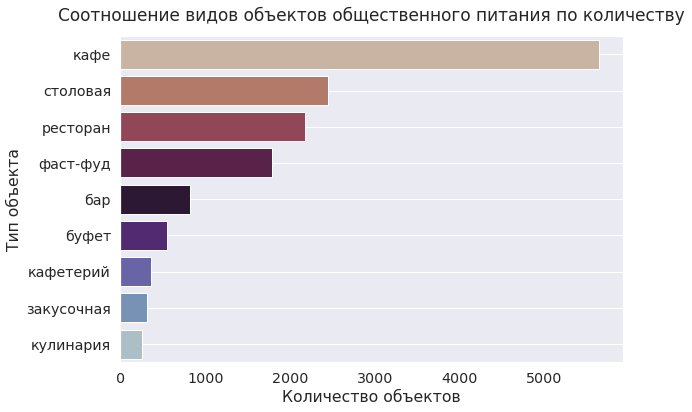

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax = rest_data.groupby(['object_type'], as_index=False).agg({'object_name':'count'}).sort_values(by='object_name',ascending=False) 
sns.barplot (data=ax, x='object_name', y='object_type', palette='twilight_r')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта')
plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=17, pad=15)
plt.grid()
plt.show()

По количеству заведений в Москве лидируют кафе, затем следуют столовые, рестораны и фаст-фуды. Наименьшим количеством заведений в Москве представлены закусочные и кулинарии.

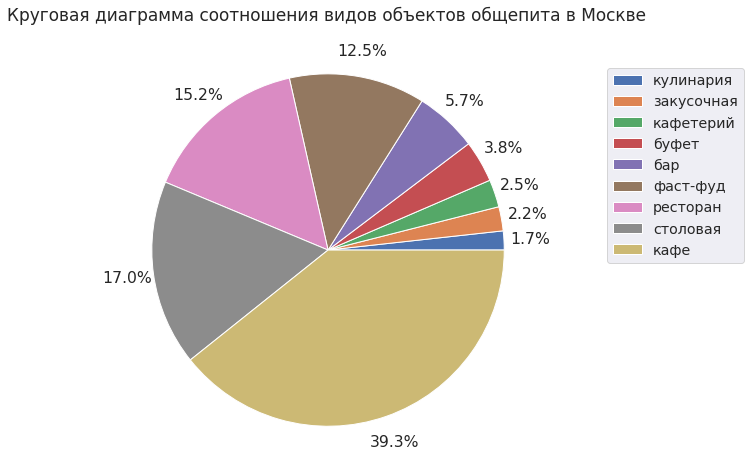

In [ ]:
test = rest_data.groupby(['object_type'])['object_name'].agg('count').sort_values().reset_index()
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(test['object_name'], autopct='%1.1f%%', pctdistance=1.15)
plt.legend(test['object_type'], bbox_to_anchor=(1.2,1))
plt.title('Круговая диаграмма соотношения видов объектов общепита в Москве', fontsize=17, pad=40)
ax.axis('equal')
plt.show()

### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
<a id="item_2"></a>

In [ ]:
rest_data.groupby('chain')['object_name'].count().sort_values()

chain
да      2804
нет    11555
Name: object_name, dtype: int64

Сразу замечаем, что большая доля приходится на несетевые заведения.

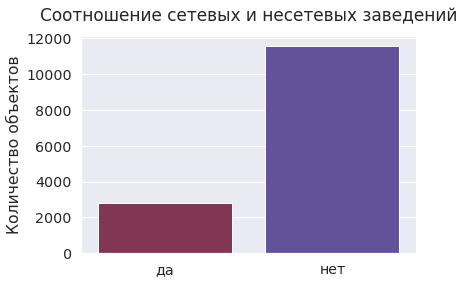

In [ ]:
fig, ax = plt.subplots()
ax = rest_data.groupby('chain')['object_name'].count().sort_values().reset_index()
sns.barplot(data= ax, x='chain', y='object_name', palette='twilight_r')
plt.title('Соотношение сетевых и несетевых заведений', fontsize=17, pad=15)
plt.ylabel('Количество объектов')
plt.xlabel(None)
plt.show()

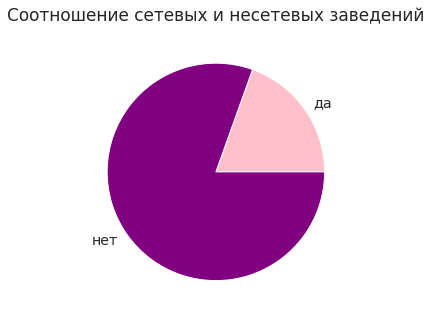

In [ ]:
rest_data.groupby('chain')['object_name'].count().sort_values().plot(kind='pie', colors =['pink', 'purple'], figsize=(5,5))
plt.title('Соотношение сетевых и несетевых заведений', fontsize=17, pad=15)
plt.ylabel(None)
plt.show()

Несмотря на то, что как интуитивно казалось, что сетевых заведений больше, они составляют от общего количества всего процентов 20. Остальные 80 приходятся на несетевые.

### 3. Для какого вида объекта общественного питания характерно сетевое распространение?
<a id="item_3"></a>

In [ ]:
chain_type = rest_data.pivot_table(index='object_type', columns='chain', values='object_name', aggfunc='count').reset_index().sort_values(by='да', ascending=False)

In [ ]:
chain_type.style.background_gradient(cmap='viridis_r')

chain,object_type,да,нет
3,кафе,1329,4311
8,фаст-фуд,731,1061
6,ресторан,513,1667
5,кулинария,77,173
2,закусочная,54,264
4,кафетерий,50,313
0,бар,36,788
1,буфет,11,538
7,столовая,3,2440


In [ ]:
chain_type.columns = ['object_type', 'yes', 'no']

In [ ]:
chain_type['all'] = chain_type['yes'] + chain_type['no']

In [ ]:
chain_type['rate_yes_chain'] = chain_type['yes'] / chain_type['all'] * 100
chain_type['rate_no_chain'] = chain_type['no'] / chain_type['all'] * 100

In [47]:
chain_type.style.background_gradient(cmap='viridis_r')

,object_type,yes,no,all,rate_yes_chain,rate_no_chain
3,кафе,1329,4311,5640,23.563830,76.436170
8,фаст-фуд,731,1061,1792,40.792411,59.207589
6,ресторан,513,1667,2180,23.532110,76.467890
5,кулинария,77,173,250,30.800000,69.200000
2,закусочная,54,264,318,16.981132,83.018868
4,кафетерий,50,313,363,13.774105,86.225895
0,бар,36,788,824,4.368932,95.631068
1,буфет,11,538,549,2.003643,97.996357
7,столовая,3,2440,2443,0.122800,99.877200


In [48]:
chain_type = chain_type.set_index('object_type')

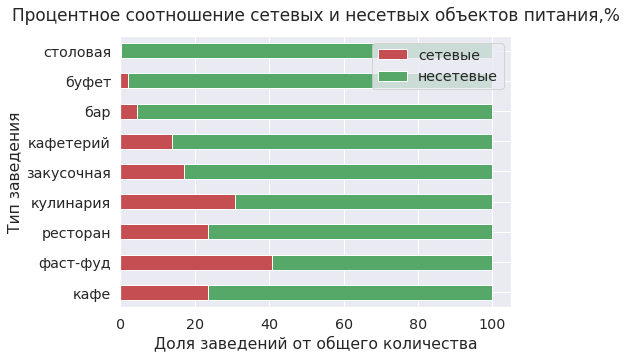

In [49]:
chain_type[['rate_yes_chain', 'rate_no_chain']].plot.barh(stacked=True, figsize=(7,5), color=('r', 'g'))
plt.title('Процентное соотношение сетевых и несетвых объектов питания,%', fontsize=17, pad=15)
plt.legend(['сетевые', 'несетевые'])
plt.xlabel('Доля заведений от общего количества')
plt.ylabel('Тип заведения')
plt.show()

Конечно, среди всех типов заведений наибольшая доля приходится на несетевые. У сетевых заведений наиболее высокая доля предприятий быстрого питания (40%). Также высока доля у магазинов кулинарии (30%), ресторанов и кафе (по 23%). Минимальная доля сетевых заведений среди столовых (почти 100% приходится на несетевые) и буфеты(2%).

### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
<a id="item_4"></a>

In [50]:
chain_yes = rest_data.query('chain == "да"')
chain_yes.head()

,id,object_name,chain,object_type,address,number,address_new
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,"абрамцевская улица, дом 1"
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,"переулок сивцев вражек, дом 6/2"
13,22579,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32,"улица авиаторов, дом 14"
16,144107,суши wok,да,фаст-фуд,"город москва, азовская улица, дом 3",7,"азовская улица, дом 3"
18,58565,тануки,да,ресторан,"город москва, большая академическая улица, дом 65",160,"большая академическая улица, дом 65"


In [51]:
chain_yes['object_name'].value_counts().head(20)

шоколадница        176
kfc                174
макдоналдс         159
бургер кинг        146
домино'с пицца      98
теремок             87
крошка картошка     82
милти               69
суши wok            67
папа джонс          48
додо пицца          45
кофе с собой        43
чайхона №1          42
хинкальная          36
якитория            34
subway              34
тануки              32
хлеб насущный       32
кофе хаус           32
starbucks           28
Name: object_name, dtype: int64

Сгруппируем табличку, которая будет показывать количество заведений каждой сети и среднее число посадочных мест.

In [52]:
data_chain = chain_yes.groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index().sort_values(by='id', ascending=False)
data_chain.head()

,object_name,id,number
512,шоколадница,176,58.153409
22,kfc,174,56.511494
303,макдоналдс,159,91.672956
104,бургер кинг,146,49.363014
152,домино'с пицца,98,17.979592


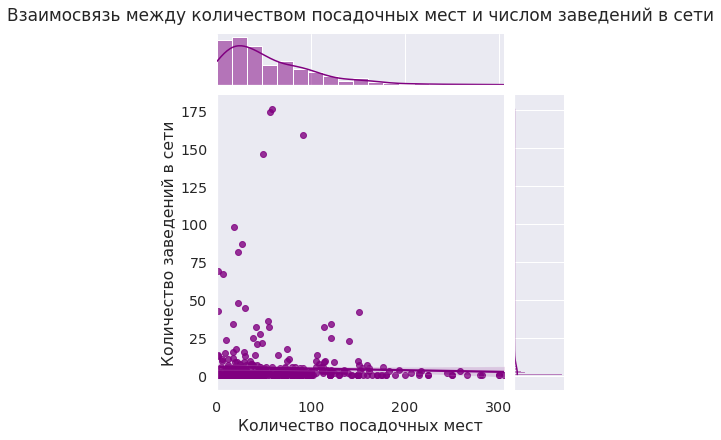

In [53]:
sns.jointplot(x='number', y='id', data=data_chain, kind='reg', color='purple')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений в сети')
plt.title('Взаимосвязь между количеством посадочных мест и числом заведений в сети', fontsize=17, pad=75)
plt.grid()
plt.show()

По графику взаимосвязи между количеством посадочных мест и количеством объектов в сети можем сделать вывод, что чем меньшим количеством заведений представлена сеть, тем больше в них посадочных мест. Такие крупные сети, как макдоналдс, шоколадница, кфс, бургер кинг имеют в среднем до 100 посадочных мест.

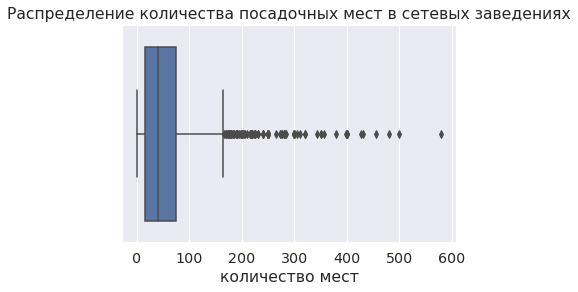

In [54]:
ax = sns.boxplot(x=chain_yes['number'])
plt.title('Распределение количества посадочных мест в сетевых заведениях')
plt.xlabel('количество мест')
plt.show()

### 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
<a id="item_5"></a>

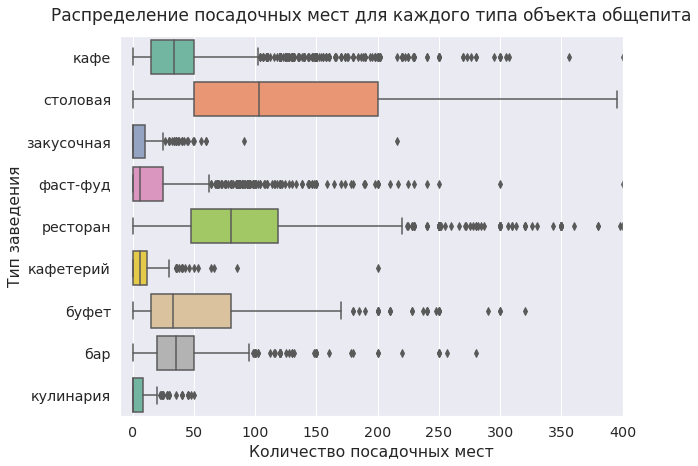

In [55]:
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.boxplot(x='number', y='object_type', data = rest_data, palette = 'Set2')
ax.set_xlim(-10, 400)
plt.title('Распределение посадочных мест для каждого типа объекта общепита', fontsize=17, pad=15)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведения')
plt.show()

In [56]:
rest_data['number'].describe()

count    14359.000000
mean        60.747615
std         75.656924
min          0.000000
25%         15.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

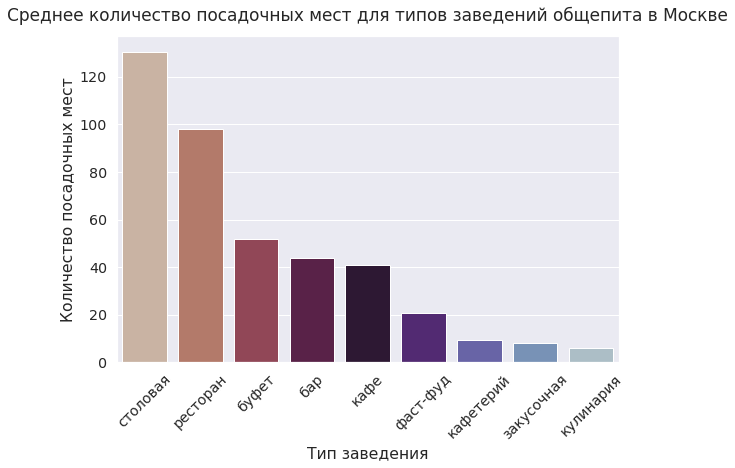

In [57]:
fig, ax = plt.subplots(figsize=(9,6))
ax = rest_data.groupby('object_type')['number'].agg('mean').reset_index().sort_values(by='number', ascending=False)
ax= sns.barplot(x='object_type', y='number', data=ax, palette='twilight_r')
plt.title('Среднее количество посадочных мест для типов заведений общепита в Москве', fontsize=17, pad=15)
plt.xlabel('Тип заведения')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=45)
plt.show()

In [58]:
rest_data[rest_data['object_type'] == 'столовая'].sample(10)

,id,object_name,chain,object_type,address,number,address_new
3754,29173,моск. гор. колледж инф-х технологий,нет,столовая,"город москва, костомаровская набережная, дом 2...",84,"костомаровская набережная, дом 29, строение 1"
2223,27781,престо,нет,столовая,"город москва, моховая улица, дом 11, строение 10",40,"моховая улица, дом 11, строение 10"
6763,147637,столовая,нет,столовая,"город москва, улица кулакова, дом 20, строение 1б",60,"улица кулакова, дом 20, строение 1б"
13714,214466,столовая кулинария,нет,столовая,"город москва, братиславская улица, дом 14",20,"братиславская улица, дом 14"
7271,28965,загорье шк. 902,нет,столовая,"город москва, педагогическая улица, дом 3",240,"педагогическая улица, дом 3"
2704,21291,столовая лиц. 342,нет,столовая,"город москва, маленковская улица, дом 17",100,"маленковская улица, дом 17"
14132,222569,столовая,нет,столовая,"город москва, улица пришвина, дом 12, корпус 2",40,"улица пришвина, дом 12, корпус 2"
10328,190427,столовая,нет,столовая,"город москва, краснопрудная улица, дом 7-9",60,"краснопрудная улица, дом 7-9"
7160,29191,гоу спо политехнического колледжа им. и.ф. пав...,нет,столовая,"город москва, дмитровское шоссе, дом 110",77,"дмитровское шоссе, дом 110"
6393,23512,ассорти,нет,столовая,"город москва, озёрная улица, дом 46",57,"озёрная улица, дом 46"


Больше всего посадочных мест в столовых и ресторанах. Меньше всего - в закусочных и кулинариях. Среди столовых преобладают столовые при различных учебных заведениях (школах, колледжах, вузах).

### 6. Выделите в отдельный столбец информацию об улице из столбца address .
<a id="item_6"></a>

In [59]:
rest_data.head()

,id,object_name,chain,object_type,address,number,address_new
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,"улица егора абакумова, дом 9"
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,"улица талалихина, дом 2/1, корпус 1"
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,"абельмановская улица, дом 6"
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,"абрамцевская улица, дом 1"
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,"абрамцевская улица, дом 9, корпус 1"


Из столбца "address_new" выделим часть строки до запятой, тем самым получим название улицы.

In [60]:
rest_data['street'] = rest_data['address_new'].apply(lambda x: x.split(',')[0])

In [61]:
rest_data['street'].value_counts()

проспект мира             195
профсоюзная улица         180
ленинградский проспект    172
пресненская набережная    165
варшавское шоссе          160
                         ... 
зарайская улица             1
хлыновский тупик            1
учинская улица              1
новолучанская улица         1
улица кутузова              1
Name: street, Length: 1830, dtype: int64

### 7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a id="item_7"></a>

In [62]:
top_10_streets = rest_data.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().head(10)

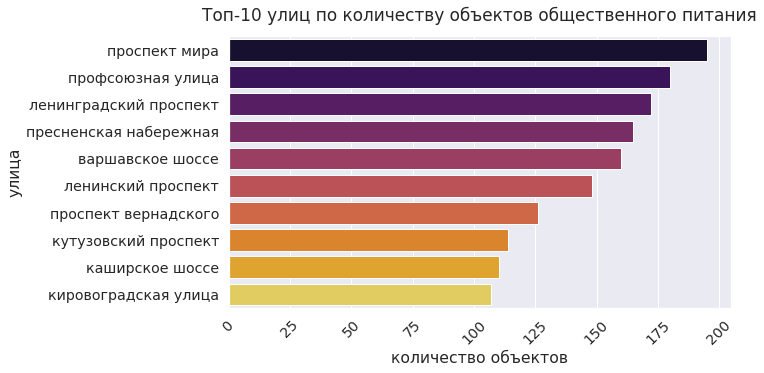

In [63]:
fig, ax = plt.subplots(figsize=(9,5))
ax=sns.barplot(x='id', y='street', data=top_10_streets, palette='inferno')
plt.xticks(rotation=45)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=17, pad=15)
plt.xlabel('количество объектов')
plt.ylabel('улица')
plt.show()

По графику видим, что в топ-10 улиц по количеству заведений общепита входят достаточно крупные и длинные улицы Москвы. Расположено на них от 100 до 200 объектов общественного питания.

Создадим список топ-10 улиц.

In [64]:
top_10 = list(top_10_streets['street'])
top_10

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

Удалим из адреса все символы

In [ ]:
symbols = [',', '«', '»', '(', ')', '"', '  ']
for s in symbols:
    rest_data['address_new'] = rest_data['address_new'].str.replace(s, ' ')

Сделаем срез данных, оставив только те улицы, которые входят в топ-10 по количеству заведений.

In [66]:
data_top_10_streets = rest_data.query('street in @top_10')

In [67]:
data_top_10_streets['address_new'].value_counts()

пресненская набережная, дом 2                  61
проспект мира, дом 211, корпус 2               53
кировоградская улица, дом 13а                  52
кутузовский проспект, дом 57                   40
проспект вернадского, дом 6                    29
                                               ..
ленинградский проспект, дом 39, строение 41     1
ленинский проспект, дом 88, строение 1          1
ленинский проспект, дом 2/4                     1
проспект мира, дом 108                          1
кутузовский проспект, дом 12, строение 9        1
Name: address_new, Length: 589, dtype: int64

Импортируем файл, найденный на портале открытых данных mos.ru с данными об улицах и районах

In [68]:
spreadsheet_id = '1epqv1xZuNxRBkEGKLOLs6OAdNkt0fyPF'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
df_new = pd.read_excel(BytesIO(r.content))

In [69]:
df_new.head()

,ADDRESS,STREET,ADM_AREA,DISTRICT
0,"город Москва, Варшавское шоссе, дом 150, строе...",Варшавское шоссе,Южный административный округ,муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",Косинская улица,Восточный административный округ,муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",Гороховский переулок,Центральный административный округ,муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",Тагильская улица,Восточный административный округ,муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",Ленинградский проспект,Северный административный округ,муниципальный округ Сокол


In [70]:
df_new['street'] = df_new['STREET']
df_new['district'] = df_new['DISTRICT']
df_new['address'] = df_new['ADDRESS']
df_new['street'] = df_new['street'].str.lower()
df_new['district'] = df_new['district'].str.lower()
df_new['address'] = df_new['address'].str.lower()

In [71]:
rest_data.head()

,id,object_name,chain,object_type,address,number,address_new,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,"улица егора абакумова, дом 9",улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,"улица талалихина, дом 2/1, корпус 1",улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,"абельмановская улица, дом 6",абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,"абрамцевская улица, дом 1",абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,"абрамцевская улица, дом 9, корпус 1",абрамцевская улица


In [72]:
df_new = df_new[['address', 'street', 'district']]
df_new.head()

,address,street,district
0,"город москва, варшавское шоссе, дом 150, строе...",варшавское шоссе,муниципальный округ чертаново южное
1,"город москва, косинская улица, дом 26а",косинская улица,муниципальный округ вешняки
2,"город москва, гороховский переулок, дом 21",гороховский переулок,муниципальный округ басманный
3,"город москва, тагильская улица, дом 4, строени...",тагильская улица,муниципальный округ метрогородок
4,"город москва, ленинградский проспект, дом 73а,...",ленинградский проспект,муниципальный округ сокол


In [73]:
moscow_data = df_new.merge(rest_data, on=['address', 'street'], how='right').drop_duplicates()

In [74]:
moscow_data.head(10)

,address,street,district,id,object_name,chain,object_type,number,address_new
0,"город москва, улица егора абакумова, дом 9",улица егора абакумова,муниципальный округ ярославский,151635,сметана,нет,кафе,48,"улица егора абакумова, дом 9"
1,"город москва, улица талалихина, дом 2/1, корпус 1",улица талалихина,муниципальный округ таганский,77874,родник,нет,кафе,35,"улица талалихина, дом 2/1, корпус 1"
2,"город москва, абельмановская улица, дом 6",абельмановская улица,муниципальный округ таганский,24309,кафе «академия»,нет,кафе,95,"абельмановская улица, дом 6"
3,"город москва, абрамцевская улица, дом 1",абрамцевская улица,муниципальный округ лианозово,21894,пиццетория,да,кафе,40,"абрамцевская улица, дом 1"
4,"город москва, абрамцевская улица, дом 9, корпус 1",абрамцевская улица,муниципальный округ лианозово,119365,кафе «вишневая метель»,нет,кафе,50,"абрамцевская улица, дом 9, корпус 1"
5,"город москва, абрамцевская улица, дом 9, корпус 1",абрамцевская улица,муниципальный округ лианозово,199543,"шаурма, выпечка",нет,фаст-фуд,0,"абрамцевская улица, дом 9, корпус 1"
6,"город москва, абрамцевская улица, дом 15, корп...",абрамцевская улица,муниципальный округ лианозово,27429,стол. при гоу сош № 1051,нет,столовая,240,"абрамцевская улица, дом 15, корпус 1"
7,"город москва, переулок сивцев вражек, дом 6/2",переулок сивцев вражек,муниципальный округ арбат,148815,брусника,да,кафе,10,"переулок сивцев вражек, дом 6/2"
8,"город москва, авиамоторная улица, дом 8, строе...",авиамоторная улица,муниципальный округ лефортово,20957,буфет мтуси,нет,столовая,90,"авиамоторная улица, дом 8, строение 1"
9,"город москва, авиамоторная улица, дом 8, строе...",авиамоторная улица,муниципальный округ лефортово,20958,кпф семья-1,нет,столовая,150,"авиамоторная улица, дом 8, строение 1"


In [75]:
df_top = moscow_data.query('street in @top_10') # сделаем срез новой таблицы только для тех улиц, которые входят в топ-10

In [76]:
df_top.head()

,address,street,district,id,object_name,chain,object_type,number,address_new
174,"город москва, варшавское шоссе, дом 2",варшавское шоссе,муниципальный округ донской,155973,кафе «андерсон»,да,кафе,150,"варшавское шоссе, дом 2"
175,"город москва, варшавское шоссе, дом 2",варшавское шоссе,муниципальный округ донской,204776,кальян бар,нет,бар,24,"варшавское шоссе, дом 2"
176,"город москва, варшавское шоссе, дом 7, корпус 1",варшавское шоссе,муниципальный округ донской,23618,кафе «subway»,да,кафе,36,"варшавское шоссе, дом 7, корпус 1"
177,"город москва, варшавское шоссе, дом 7, корпус 1",варшавское шоссе,муниципальный округ донской,166556,кафе суши wok,да,фаст-фуд,8,"варшавское шоссе, дом 7, корпус 1"
178,"город москва, варшавское шоссе, дом 7, корпус 1",варшавское шоссе,муниципальный округ донской,181111,кафе «doner city»,нет,фаст-фуд,1,"варшавское шоссе, дом 7, корпус 1"


In [77]:
streets_grouped = df_top.groupby(['street', 'district']).agg({'id':'count'})
streets_grouped.style.background_gradient(cmap='inferno')

Из таблицы замечаем, что улицы с большим количеством заведений проходят через несколько районов Москвы. Самая короткая из всех улица, расположенная только водном районе - Пресненская набережная (Пресненский район). Но именно здесь мы видим расположение наибольшего количества заведений общепита. Все это объясняется высоким сосредоточением офисов в данном районе и следовательно большим спросом на такие заведения.

In [78]:
top_10_streets

,street,id
0,проспект мира,195
1,профсоюзная улица,180
2,ленинградский проспект,172
3,пресненская набережная,165
4,варшавское шоссе,160
5,ленинский проспект,148
6,проспект вернадского,126
7,кутузовский проспект,114
8,каширское шоссе,110
9,кировоградская улица,107


In [79]:
df_top['district'].value_counts().head(10)

муниципальный округ пресненский              162
муниципальный округ чертаново центральное     89
муниципальный округ тропарево-никулино        84
муниципальный округ аэропорт                  64
муниципальный округ обручевский               64
муниципальный округ мещанский                 63
муниципальный округ дорогомилово              61
муниципальный округ нагатино-садовники        56
муниципальный округ свиблово                  55
муниципальный округ фили-давыдково            53
Name: district, dtype: int64

In [80]:
df_top['object_type'].value_counts().head(10)

кафе          619
ресторан      289
фаст-фуд      249
столовая      139
бар            63
кафетерий      48
буфет          31
кулинария      23
закусочная     16
Name: object_type, dtype: int64

Cреди районов по количеству заведений лидирует пресненский район, что неудивительно, так как на его расположены крупные предприятия, деловые комплексы (Москва-Сити). Среди объектов питания на популярных улицах преобладают кафе, рестораны и фаст-фуды.

Улицы, входящие в топ-10 по количеству заведений общепита это крупные и длинные улицы, проходящие через большое количество районов и на территории которых располагается большое количество офисов.

### 8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a id="item_8"></a>

In [81]:
count_on_street = rest_data.groupby('street').agg({'id':'count'}).reset_index()
one_on_street = count_on_street.query('id == 1')
len(one_on_street)

540

Улиц с одним общественным заведением в Москве 540

In [82]:
list_of_streets = list(one_on_street['street'])

Сделаем срез по улицам, на которых расположен только один объект общественного питания.

In [83]:
one_object_street = moscow_data.query('street in @list_of_streets')
one_object_street.head()

,address,street,district,id,object_name,chain,object_type,number,address_new
21,"город москва, филипповский переулок, дом 15/5",филипповский переулок,муниципальный округ арбат,153644,американская лаборатория десертов,нет,кафе,20,"филипповский переулок, дом 15/5"
77,"город москва, бабаевская улица, дом 3",бабаевская улица,муниципальный округ сокольники,21214,столовая,нет,столовая,90,"бабаевская улица, дом 3"
86,"город москва, 1-й балтийский переулок, дом 3/25",1-й балтийский переулок,муниципальный округ аэропорт,22139,хуанхэ,нет,ресторан,60,"1-й балтийский переулок, дом 3/25"
100,"город москва, улица демьяна бедного, дом 4",улица демьяна бедного,муниципальный округ хорошево-мневники,25833,азербайджан,нет,ресторан,180,"улица демьяна бедного, дом 4"
151,"город москва, будайская улица, дом 3",будайская улица,муниципальный округ ростокино,150881,вгик,нет,столовая,45,"будайская улица, дом 3"


In [84]:
one_object_street['district'].value_counts().head(10)

муниципальный округ таганский         26
муниципальный округ хамовники         26
муниципальный округ басманный         22
муниципальный округ тверской          20
муниципальный округ пресненский       19
муниципальный округ марьина роща      17
муниципальный округ сокольники        14
муниципальный округ замоскворечье     12
муниципальный округ соколиная гора    12
муниципальный округ мещанский         12
Name: district, dtype: int64

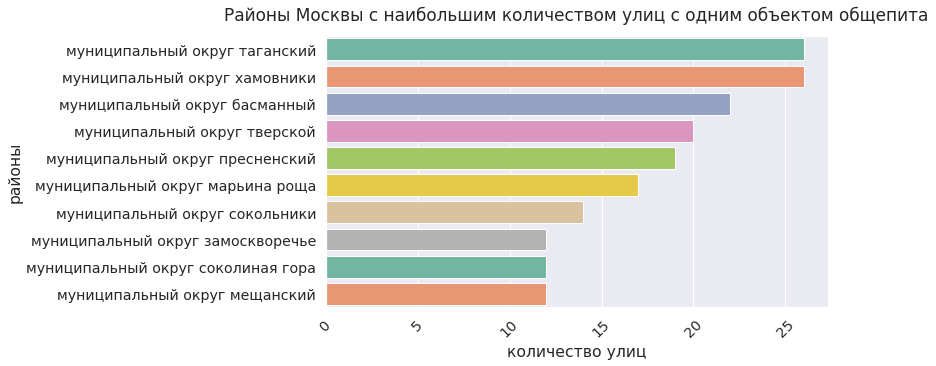

In [85]:
fig, ax = plt.subplots(figsize=(9,5))
ax = one_object_street['district'].value_counts().reset_index().head(10)
sns.barplot(x='district', y='index', data=ax, palette='Set2')
plt.xticks(rotation=45)
plt.title('Районы Москвы с наибольшим количеством улиц с одним объектом общепита', fontsize=17, pad=15)
plt.xlabel('количество улиц')
plt.ylabel('районы')
plt.show()

In [86]:
one_object_top = one_object_street['object_type'].value_counts().reset_index().head(10)
one_object_top

,index,object_type
0,столовая,218
1,кафе,154
2,буфет,58
3,ресторан,52
4,бар,21
5,фаст-фуд,16
6,закусочная,11
7,кулинария,7
8,кафетерий,3


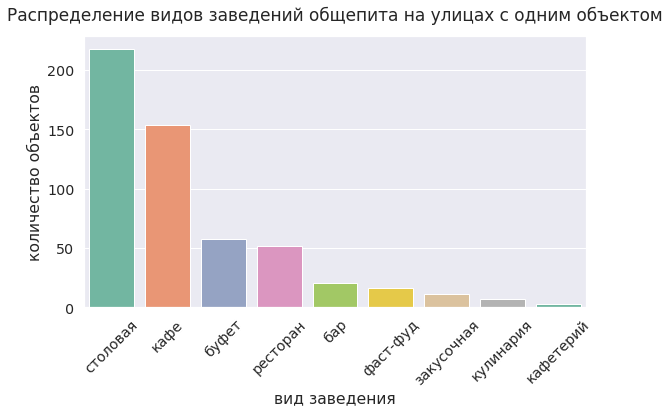

In [87]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(x='index', y='object_type', data=one_object_top, palette='Set2')
plt.xticks(rotation=45)
plt.title('Распределение видов заведений общепита на улицах с одним объектом', fontsize=17, pad=15)
plt.xlabel('вид заведения')
plt.ylabel('количество объектов')
plt.show()

Больше всего улиц с одним заведение общепита в центральном округе Москвы (Таганский, Басманный, Хамовники, Мещанский, Замоскворечье, Тверской округа). Наибоьшая доля объектов на таких улицах приходится на столовые и кафе.

### 9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
<a id="item_9"></a>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


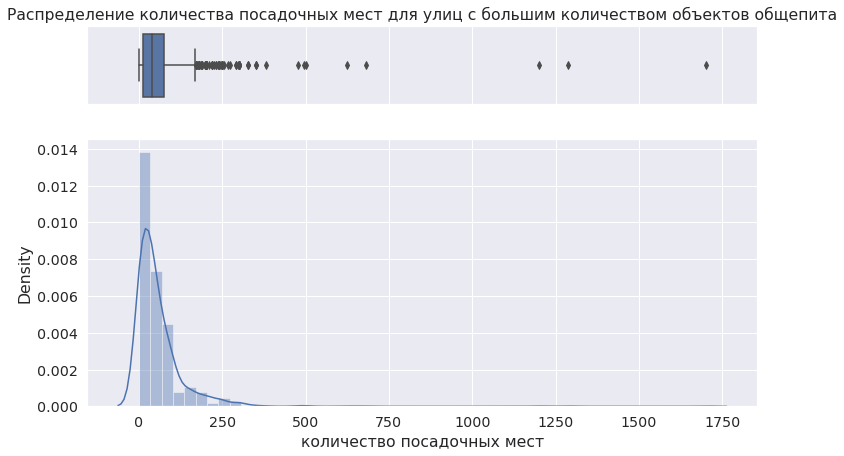

In [88]:
figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.25, .85)}, figsize=(12,7))
#plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общепита', fontsize=17, pad=15)
sns.boxplot(df_top['number'], ax=ax_box)
sns.distplot(df_top['number'], ax=ax_hist)
plt.xlabel('количество посадочных мест')
ax_box.set(xlabel=None)
ax_box.set(title='Распределение количества посадочных мест для улиц с большим количеством объектов общепита')
plt.show()

Можем сделать вывод, что в заведениях, расположенных на улицах с большим количеством объектов общепита, мало посадочных мест. Причиной этому является дорогая аренда помещения.

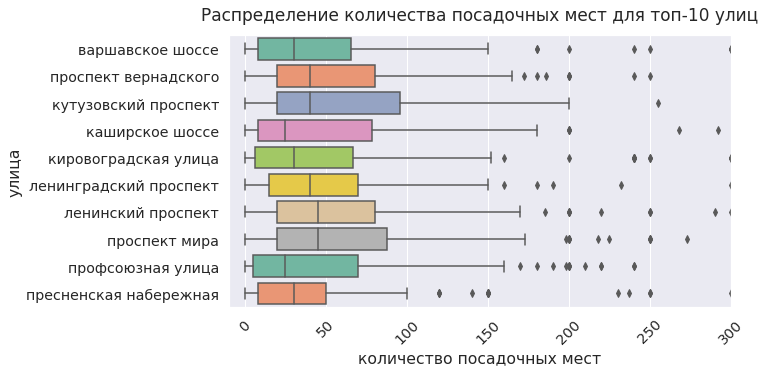

In [89]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.boxplot(x='number', y='street', data=df_top, palette='Set2')
plt.xticks(rotation=45)
plt.title('Распределение количества посадочных мест для топ-10 улиц', fontsize=17, pad=15)
plt.xlabel('количество посадочных мест')
plt.ylabel('улица')
ax.set_xlim(-10,300)
plt.show()

Для топ-10 улиц с наибольшим количеством заведений общепита характерно небольшое количество посадочных мест. Наименьшее количество посадочных мест среди таких улиц в заведениях на пресненской набережной. Как мы рассматривали выше именно в Пресненском районе больше всего количество объектов общепита.

## Шаг 3. Презентация
<a id="step3"></a>

Презентация: https://drive.google.com/file/d/1RnXBCfmb-sBmWbGbMOUWCr9gEdmyyfDX/view?usp=sharing

## Вывод:

В данном проекте мы провели исследование рынка заведений общественного питания в Москве. Для начала мы провели первичный анализ и предобработку данных. Привели данные в более удобный для исследования вид. А также удалили данные о заведениях общепита за пределами Москвы (Новую Москву в проекте решили не рассматривать). Исходя из проведенного анализа можем сделать следующие выводы:

- По количеству заведений в Москве лидируют кафе, затем следуют столовые, рестораны и фаст-фуды. Наименьшим количеством заведений в Москве представлены закусочные и кулинарии.
- По соотношению сетевых и несетевых заведений преобладают несетевые. На их долю приходится 80%.
- Среди всех типов заведений наибольшая доля приходится на несетевые. У сетевых заведений наиболее высокая доля предприятий быстрого питания (40%). Также высока доля у магазинов кулинарии (30%), ресторанов и кафе (по 23%). Минимальная доля сетевых заведений среди столовых (почти 100% приходится на несетевые) и буфеты(2%).
- Чем меньшим количеством заведений представлена сеть, тем больше в них посадочных мест. Такие крупные сети, как макдоналдс, шоколадница, кфс, бургер кинг имеют в среднем до 100 посадочных мест.
- Больше всего посадочных мест в столовых и ресторанах. Меньше всего - в закусочных и кулинариях.
- Среди столовых преобладают столовые при различных учебных заведениях (школах, колледжах, вузах).
- Cреди районов по количеству заведений лидирует Пресненский район (на его территории расположены крупные предприятия и деловые комплексы, самый известный и крупный в Москве комплекс Москва-Сити).
- Больше всего улиц с одним заведение общепита в центральном округе Москвы (Таганский, Басманный, Хамовники, Мещанский, Замоскворечье, Тверской округа).
- В заведениях, расположенных на улицах с большим количеством объектов общепита, мало посадочных мест. Причиной этому является дорогая аренда помещения.

Что касается рекомендаций, то как мне кажется без данных о посещаемости данных заведений, дать советы, которые могли бы помочь в развитии бизнеса в данной сфере будет непросто. Исходя из статистики, среди заведений общепита преобладают несетевые заведения, типа столовых (причем большинство столовых относится к различным учебным заведениям). На долю сетевых заведений приходится 80%. Но это не говорит о неуспешности сетевых заведений. Отнюдь, большинство заведений, которые у нас на слуху, являются именно сетевыми. Среди данного типа объектов большая доля приходится на предприятия быстрого питания, кулинарии, рестораны и кафе. Среди топ-10 улиц по количеству заведений преобладают достаточно крупные улицы, проходящие через большое количество районов Москвы. Лидером по количеству заведений является Пресненский район, известный большим количеством расположенных на его территории бизнес-центров (Москва-Сити). Среди заведений здесь преобладают кафе, рестораны и фаст-фуды. Как правило количество посадочных мест, которые заведения готовы предложить посетителям на таких популярных улицах, невелико встедствие большой аренды за помещения в данных районах. В Центральном округе Москвы есть достаточно много улиц, на которых располагается всего один объект питания (причем наибольшая часть из них приходится на столовые, которые, как мы уже говорили ранее относится к учебным заведениям, следовательно вероятность встретить общедоступные объекты питания на таких улицах крайне мала)